In [305]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import accuracy_score



In [306]:

# Load the dataset
df = pd.read_csv('DISASTERS/1900_2021_DISASTERS.xlsx - emdat data.csv')
df_original = df.copy()

# Filter out data whose value is earthquake in the Disaster Type column
df = df[df['Disaster Type'] == 'Earthquake']
df.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,GTM,Central America,Americas,"Quezaltenango, San Marcos",NaN,Tsunami/Tidal wave,NaN,NaN,NaN,NaN,NaN,8.0,Richter,14,-91,20:20,NaN,1902,4.0,18.0,1902,4.0,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
9,1905,3,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,India,IND,Southern Asia,Asia,Kangra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,Richter,32.04,76.16,06:20,NaN,1905,4.0,4.0,1905,4.0,4.0,20000.0,NaN,NaN,NaN,NaN,NaN,25000.0,3.479379,NaN,NaN,NaN,NaN
10,1906,14,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Chile,CHL,South America,Americas,Valparaiso,NaN,Tsunami/Tidal wave,NaN,NaN,NaN,NaN,NaN,8.0,Richter,33.05,71.4,19:57,NaN,1906,8.0,16.0,1906,8.0,16.0,20000.0,NaN,NaN,NaN,NaN,NaN,100000.0,3.479379,NaN,NaN,NaN,NaN
11,1906,2,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Colombia,COL,South America,Americas,Tumako,NaN,Tsunami/Tidal wave,NaN,NaN,No,No,NaN,9.0,Richter,1.51 N,78.46 W,NaN,NaN,1906,1.0,31.0,1906,1.0,31.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
15,1907,6,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,China,CHN,Eastern Asia,Asia,Tien Shan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,Richter,38.5,69.9,09:23,NaN,1907,10.0,21.0,1907,10.0,21.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.608245,NaN,NaN,NaN,NaN


In [307]:
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization


#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  1544
nNumber of features: 45
nData Features:
['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', "Insured Damages ('000 US$)", "Total Damages ('000 US$)", 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations']
nMissing values: 26175
nUnique values:
Year                           120
Seq                            536
Glide                           81
Disaster Group                   1
Disaster Subgroup                1
Disaster Type                

In [308]:
# columns_to_remove = ['Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'River Basin', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected',
#                       'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations','Origin', 'Dis Mag Scale']
# df.drop(columns_to_remove, axis=1, inplace=True)
# # 'Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin' ,  'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time'
selected_features = ['Year', 'Country', 'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day', 'Dis Mag Value', 'Total Deaths', "Total Damages ('000 US$)"]

# df.drop(["Insured Damages ('000 US$)"	,"Total Damages ('000 US$)"], axis=1, inplace=True)
# # Save the new dataset

df = df[selected_features]
df.to_csv('new_dataset.csv')

In [309]:
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  1544
nNumber of features: 10
nData Features:
['Year', 'Country', 'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day', 'Dis Mag Value', 'Total Deaths', "Total Damages ('000 US$)"]
nMissing values: 1513
nUnique values:
Year                         120
Country                      122
Latitude                    1329
Longitude                   1388
Start Year                   120
Start Month                   12
Start Day                     31
Dis Mag Value                 10
Total Deaths                 308
Total Damages ('000 US$)     283
dtype: int64


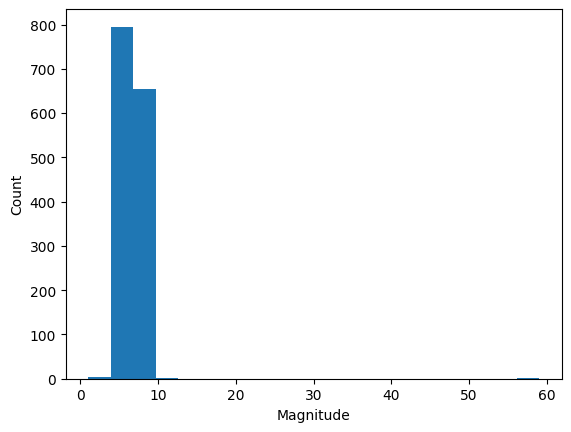

In [310]:
# Plot a histogram of the magnitudes
plt.hist(df['Dis Mag Value'], bins=20)
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()

In [311]:
df['Latitude'] = df['Latitude'].str.extract(r'(\d+\.\d+)')
df['Latitude'] = df['Latitude'].astype(float)

# Convert Longitude column to float
df['Longitude'] = df['Longitude'].str.extract(r'(\d+\.\d+)')
df['Longitude'] = df['Longitude'].astype(float)

In [312]:
df['Latitude'] = df.groupby('Country')['Latitude'].transform(lambda x: x.fillna(x.mean()))
df['Longitude'] = df.groupby('Country')['Longitude'].transform(lambda x: x.fillna(x.mean()))

90.56636428571427


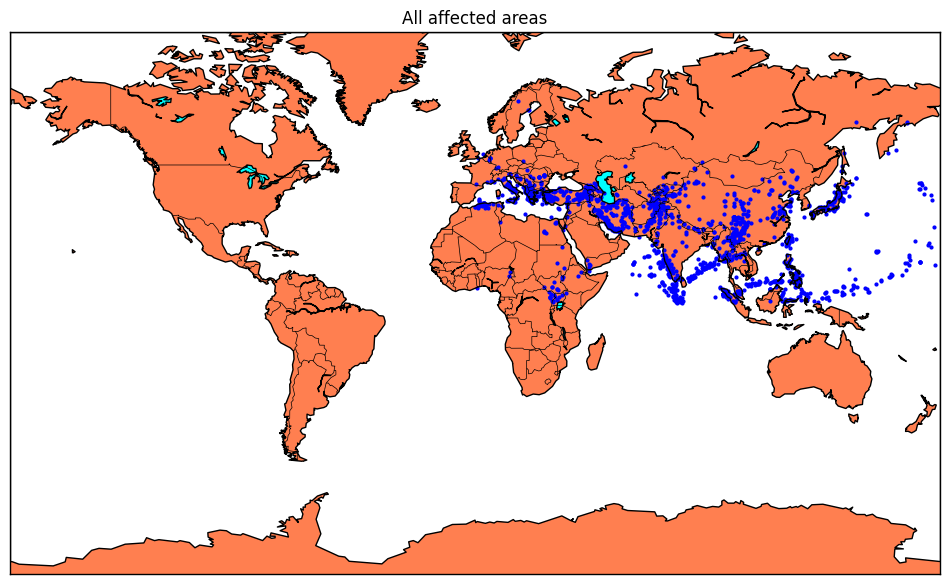

In [313]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')


longitudes = df["Longitude"].to_list()
latitudes = df["Latitude"].to_list()
print(longitudes[0])
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [314]:
df.head()

,Year,Country,Latitude,Longitude,Start Year,Start Month,Start Day,Dis Mag Value,Total Deaths,Total Damages ('000 US$)
2,1902,Guatemala,14.510114,90.566364,1902,4.0,18.0,8.0,2000.0,25000.0
9,1905,India,32.040000,76.160000,1905,4.0,4.0,8.0,20000.0,25000.0
10,1906,Chile,33.050000,71.400000,1906,8.0,16.0,8.0,20000.0,100000.0
11,1906,Colombia,1.510000,78.460000,1906,1.0,31.0,9.0,400.0,NaN
15,1907,China,38.500000,69.900000,1907,10.0,21.0,7.0,12000.0,NaN


In [315]:
df.isnull().sum()

Year                          0
Country                       0
Latitude                      0
Longitude                     1
Start Year                    0
Start Month                   2
Start Day                     3
Dis Mag Value                89
Total Deaths                381
Total Damages ('000 US$)    956
dtype: int64

In [316]:
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  1544
nNumber of features: 10
nData Features:
['Year', 'Country', 'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day', 'Dis Mag Value', 'Total Deaths', "Total Damages ('000 US$)"]
nMissing values: 1432
nUnique values:
Year                         120
Country                      122
Latitude                    1295
Longitude                   1350
Start Year                   120
Start Month                   12
Start Day                     31
Dis Mag Value                 10
Total Deaths                 308
Total Damages ('000 US$)     283
dtype: int64


In [317]:
# # Convert 'NaN' values to None
# df['Local Time'] = df['Local Time'].replace('NaN', None)
# # Parse and standardize the time using pd.to_datetime()
# df['Local Time'] = pd.to_datetime(df['Local Time'], format='%H:%M', errors='coerce').dt.hour * 60 + pd.to_datetime(df['Local Time'], format='%H:%M', errors='coerce').dt.minute

In [318]:
# df[['Local Time', 'Dis Mag Value', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day']] = df.groupby('Country')[['Local Time', 'Dis Mag Value', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day']].transform(lambda x: x.fillna(x.mean()))
# df['Total Deaths'].fillna(0, inplace=True)

In [320]:
# Initialize BinaryEncoder
# encoder = ce.BinaryEncoder(cols=['Country', 'ISO', 'Region', 'Continent', 'Location'])

# # Apply binary encoding
# df = encoder.fit_transform(df)

# df = pd.get_dummies(df, columns=['Country', 'ISO', 'Region', 'Continent', 'Location'])
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# # encode labels in column 'species'
# df['Country', 'ISO', 'Region', 'Continent', 'Location'] = label_encoder.fit_transform(df['Country', 'ISO', 'Region', 'Continent', 'Location'])


from sklearn.preprocessing import OrdinalEncoder

# create an instance of the encoder
encoder = OrdinalEncoder()

# define the columns to encode
# cols_to_encode = ['Country', 'ISO', 'Region', 'Continent', 'Location']
cols_to_encode = ['Country']

# fit and transform the data
df[cols_to_encode] = encoder.fit_transform(df[cols_to_encode])

In [321]:
corr = df.corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [323]:
X = df.drop(['Dis Mag Value'], axis=1)
y = df['Dis Mag Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X.isna().sum())

(1235, 9) (309, 9) (1235,) (309,)
Year                          0
Country                       0
Latitude                      0
Longitude                     1
Start Year                    0
Start Month                   2
Start Day                     3
Total Deaths                381
Total Damages ('000 US$)    956
dtype: int64


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train[['Latitude', 'Longitude', 'Local Time', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths']] = scaler.fit_transform(X_train[['Latitude', 'Longitude', 'Local Time', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths']])
# X_test[['Latitude', 'Longitude', 'Local Time', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths']] = scaler.transform(X_test[['Latitude', 'Longitude', 'Local Time', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths']])

In [324]:
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)
y_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [347]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
 
# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

y_pred

Mean Squared Error (MSE): 9.080487073691287


array([ 6.6345177 ,  4.663788  ,  5.505343  ,  6.1611204 ,  8.050586  ,
        5.942601  ,  6.6255426 ,  6.591158  ,  5.5750017 ,  5.91858   ,
        5.910101  ,  6.85436   ,  6.7055755 ,  6.1974645 ,  3.7631655 ,
        7.1555977 ,  4.8987627 ,  5.5029545 ,  6.244809  ,  5.3195386 ,
        4.858697  ,  5.6327796 ,  5.627194  ,  6.3126984 ,  5.505428  ,
        6.9297867 ,  5.7420588 ,  6.987535  ,  6.578552  ,  2.0330482 ,
        7.6012197 , 47.26802   ,  5.520368  ,  4.139876  ,  6.834544  ,
        7.0742745 ,  5.8243866 ,  6.2015123 ,  5.5186486 ,  5.9666233 ,
        5.760253  ,  6.56676   ,  3.7013502 ,  3.260978  ,  6.021658  ,
        7.2316504 ,  3.317566  ,  3.043307  ,  7.248407  ,  6.753997  ,
        3.5259373 ,  8.391703  ,  4.8780346 ,  6.235027  ,  4.9984455 ,
        7.2068453 ,  4.9751606 ,  5.1078105 ,  6.344091  ,  6.981102  ,
        5.895372  ,  5.7231164 ,  6.8321896 ,  7.1800885 ,  7.1975474 ,
        5.5532765 ,  6.760875  ,  7.1496964 ,  5.4992223 ,  6.53

In [349]:
y_test.to_numpy()

array([ 5.,  5.,  6.,  7.,  9.,  5.,  6.,  7.,  6.,  6.,  7.,  8.,  7.,
        5.,  0.,  6.,  7.,  6.,  6.,  6.,  6.,  6.,  7.,  6.,  7.,  7.,
        6.,  6.,  6.,  0.,  7.,  5.,  5.,  6.,  8.,  6.,  7.,  6.,  5.,
        7.,  6.,  5.,  0.,  7.,  6.,  7.,  6.,  4.,  5.,  6.,  7.,  0.,
        5.,  8.,  7.,  6.,  6.,  6.,  6.,  7.,  5.,  6.,  6.,  0.,  8.,
        6.,  6.,  8.,  6.,  5.,  7.,  7.,  6.,  7.,  0.,  0.,  7.,  7.,
        7.,  8.,  5.,  7.,  7.,  7.,  0.,  6.,  8.,  7.,  6.,  5.,  6.,
        6.,  7.,  6.,  6.,  7.,  7.,  7.,  6.,  8.,  6.,  8.,  7.,  7.,
        7.,  9.,  7.,  8.,  6.,  7.,  5.,  6.,  6.,  7.,  6.,  7.,  6.,
        6.,  7.,  8.,  8.,  0.,  7.,  7.,  0.,  7.,  6.,  5.,  5.,  6.,
        5.,  7.,  8.,  6.,  8.,  7.,  6.,  5.,  5.,  6.,  0.,  5.,  8.,
        7.,  6.,  8.,  9.,  5.,  9.,  7.,  7.,  6.,  8.,  6.,  8.,  6.,
        7.,  6.,  6.,  7.,  5.,  0.,  7.,  5.,  5.,  0.,  7.,  0.,  5.,
        6.,  8.,  6.,  5.,  7.,  7.,  7.,  5.,  8.,  6.,  7.,  7

In [342]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score


bagging = BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
bagging.fit(X_train,y_train)
y_pred = bagging.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

R2 Score:  0.12636432175545653


In [338]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=1, random_state=1)

adaboost.fit(X_train,y_train)
y_pred = adaboost.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

R2 Score:  -0.1782344798125457


In [332]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='relu'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [333]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

neurons = [64, 128]
# neurons = [16]
batch_size = [10, 20]
# batch_size = [10]
epochs = [10]
activation = ['relu']
# activation = ['sigmoid', 'relu']
optimizer = ['SGD', 'RMSprop', 'Adam']
# optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

C:\Users\ankit\AppData\Local\Temp\ipykernel_11664\1463224282.py:3: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [334]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.042915 using {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 128, 'optimizer': 'Adam'}
0.034008 (0.030469) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 64, 'optimizer': 'SGD'}
0.023482 (0.025657) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 64, 'optimizer': 'RMSprop'}
0.021862 (0.026806) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 64, 'optimizer': 'Adam'}
0.024291 (0.029082) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 128, 'optimizer': 'SGD'}
0.017004 (0.020707) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 128, 'optimizer': 'RMSprop'}
0.042915 (0.021817) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 128, 'optimizer': 'Adam'}
0.0